<br>
<br>
# **금융 데이터 정리 및 Maria DB로 전환**
2018-06-16 
1. 우선 Sqlite3 를 CSV 등으로 추출정리 한다
1. 이를 Maria DB 등의 대용량 저장DB로 변환한다

<br><br>
## **1 Web Crawling**
웹페이지를 활용하여 필요한 정보들 수집

<br>
### **01 현재 작업PC의 IP주소 가져오기**
http://checkip.dyndns.com/

In [1]:
from finance import getIP
getIP()

'222.235.14.181'

<br><br>
### **02 ThinkPool : 대차정보**
[ThinkPool](http://thinkpool.com/itemanal/i/loanTransaction.jsp?code=005930&pageNo=1)

In [2]:
from finance import Thinkpool
tkf = Thinkpool()
df  = tkf.loan('005930.KS', p_no=3)
df.tail(3)

,Date,체결(주수),상환(주수),잔고 주수,잔고 금액(백만),증감(수량)
17,2018-03-19,64079,30422,3340303,8474349,33657
18,2018-03-16,79667,27800,3305441,8452013,51867
19,2018-03-15,53185,17016,3258942,8398294,36169


<br><br>
### **03 ThinkPool : 공매도정보**
[ThinkPool](http://thinkpool.com/itemanal/i/stockSelling.jsp?code=005930&pageNo=1)

In [3]:
df  = tkf.short('005930.KS', p_no=1)
df.tail(3)

,Date,거래량,공매도량,매매비중,평균가,금액(천원)
17,2018-05-18,6706570,579606,8.64,49586,28740343
18,2018-05-17,10365440,512949,4.95,49960,25626932
19,2018-05-16,15918683,1897346,11.92,49751,94394861


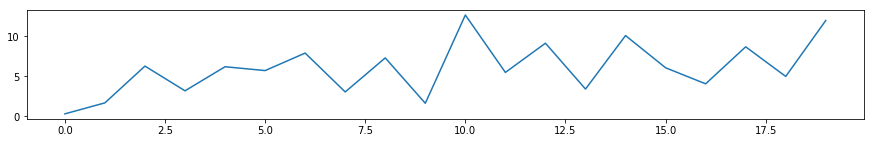

In [4]:
%matplotlib inline
df.매매비중.plot(figsize=(15,2))

<br>
### **04 ThinkPool 대차정보와 공매도정보 요약**
[ThinkPool](http://thinkpool.com/itemanal/i/stockSelling.jsp?code=005930&pageNo=1)
1. 1개의 테이블로 2테이블 내용을 묶기
1. 생각보다 시간이 소요된다는 점에 주의할 것

In [5]:
tkf.merge('005930.KS')

,Date,거래량,공매도량,잔고 주수,증감(수량)
0,2018-06-15,17080892,48831,139879603,1010949


<br>
### **05 신한금융 거래원정보**
<small>http://thinkpool.com/itemanal/i/stockSelling.jsp?code=005930&pageNo=1</small>
1. 1개의 테이블로 2테이블 내용을 묶기
1. 생각보다 시간이 소요된다는 점에 주의할 것

In [6]:
from finance import Shinhan

shin = Shinhan()
df = shin.trader('005930.KS')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 11 columns):
날짜      39 non-null object
개인      39 non-null int64
외국인계    39 non-null int64
기관계     39 non-null int64
증권      39 non-null int64
투신      39 non-null int64
은행      39 non-null int64
종금      39 non-null int64
보험      39 non-null int64
기금      39 non-null int64
기타      39 non-null int64
dtypes: int64(10), object(1)
memory usage: 3.7+ KB


In [7]:
df.head()

,날짜,개인,외국인계,기관계,증권,투신,은행,종금,보험,기금,기타
0,2018/06/18,1478659,-4074138,2742128,3177257,-245967,43978,-8932,-165441,-390469,-147017
1,2018/06/15,3611111,-5045243,1424010,905065,-80139,14411,-8919,-209403,162316,1400
2,2018/06/14,5560679,-6783692,990562,2645344,-277607,42803,24648,-53018,-492918,167768
3,2018/06/12,2198271,-1685960,-606408,917889,-258442,13268,-4760,-213803,-746118,12979
4,2018/06/11,875722,-1599662,706218,735340,-365469,-22874,-7190,-53716,-490840,12623


<br><br>
### **06 Daum :  기업정보**
[Daum Finance](http://finance.daum.net/item/main.daum?code=005930&pageNo=1)

In [8]:
# 기업의 이름 및 정보 수집
from finance import Daum
daum = Daum()
daum.info('005930.KS')

('삼성전자', '코스피')

<br>
### **07 Daum : 상위거래원**
[Daum Finance](http://finance.daum.net/item/main.daum?code=005930&pageNo=1)

In [9]:
df = daum.trader('005930.KS')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
거래원    20 non-null object
매도     20 non-null int64
매수     20 non-null int64
순매매    20 non-null int64
dtypes: int64(3), object(1)
memory usage: 720.0+ bytes


In [10]:
df.tail(3)

,거래원,매도,매수,순매매
17,교 보,0,269329,269329
18,메릴린치,0,135283,135283
19,맥쿼리,0,58649,58649


<br>
### **08 Daum : 추가 가격정보 요약**
[Daum Finance](http://finance.daum.net/item/main.daum?code=005930&pageNo=1)

In [11]:
result = daum.price('005930.KS')
result

{'Code': '005930.KS',
 'Date': '2018/06/18',
 'High': 47650,
 'Low': 46200,
 'Price': 47600,
 'Volume': 16616659,
 '시총(억)': '2,991,405억',
 '외인비율': '52.80%'}

<br><br>
## **2 Dart API  Crawling**
Dart Nice 기타 정보사이트 수집하기

In [3]:
# 상장사 기업목록 및 코드추출
from finance import Dart
dart = Dart()
market_codes = dart.get_code()
print(market_codes.shape)
market_codes.head(3)

(2314, 3)


,No,Krx,Name
0,091990,kosdaq,셀트리온헬스케어
1,215600,kosdaq,신라젠
2,086900,kosdaq,메디톡스


In [2]:
# 상장사 가격정보 수집
market_price = dart.get_price()
print(market_price.shape)
market_price.head(3)

(2314, 15)


,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가,고가,저가,시가총액,시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
0,005930,삼성전자,46600,-1050,-2.2,16661870,776901880750,47600,47650,46200,299140531020000,16.02,6419324700,NaN,NaN
1,000660,SK하이닉스,84000,-3000,-3.4,4723914,396093543200,86800,86900,82300,61152198660000,3.27,728002365,NaN,NaN
2,068270,셀트리온,305000,6500,2.2,1658676,506429563464,302000,311000,299000,38245750415000,2.05,125395903,NaN,NaN


In [3]:
# 상장사 기업정보 추출
market_info = dart.get_market()
print(market_info.shape)
market_info.head(3)

(2197, 9)


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BYC,001460,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,유 중 화,http://www.byc.co.kr,서울특별시
1,CJ CGV,079160,"영화, 비디오물, 방송프로그램 제작 및 배급업","영화상영,영화관 운영",2004-12-24,12월,서 정,http://www.cgv.co.kr,서울특별시
2,DB손해보험,005830,보험업,"자동차보험,화재보험,해상보험,특종보험,장기보험",1973-06-28,12월,김정남,http://www.idbins.com,서울특별시


In [4]:
# 상장사 기업별 정보 추출
dart.get_info('005930')

,설명,내용
0,에러코드,000
1,에러메시지,정상
2,정식명칭,삼성전자(주)
3,영문명칭,"SAMSUNG ELECTRONICS CO,.LTD"
4,약식명칭,삼성전자
5,종목코드,005930
6,대표자명,"김기남, 김현석, 고동진"
7,법인구분,Y
8,법인등록번호,1301110006246
9,사업자등록번호,1248100998


In [22]:
# DART 공시정보 내용 살펴보기
dart.get_search('005930', '20180613', '3')

page_no : 1  total_count : 2  total_page : 1


,crp_cd,crp_cls,crp_nm,flr_nm,rcp_dt,rcp_no,rmk,rpt_nm
0,005930,Y,삼성전자,김보현,20180615,20180615000159,,임원ㆍ주요주주특정증권등소유상황보고서
1,005930,Y,삼성전자,이병철,20180614,20180614000405,,임원ㆍ주요주주특정증권등소유상황보고서


<br><br>
## **2 Nice 재무정보 Crawling**
Nice 기타 정보사이트 수집하기

In [1]:
# 연간 재무정보 수집
from finance import Nice
nice = Nice()
nice_fin = nice.get_fin_year('005930')
nice_fin

,구분,2016.12,2017.12,2018.03,2018.12(E)
0,매출액(억원),2018667,2395754,605637,2538060
1,영업이익(억원),292407,536450,156422,641535
2,영업이익율(%),14.49,22.39,25.83,25.28
3,당기순이익(억원),224157,413446,116118,484513
4,순이익율(%),11.1,17.26,19.17,19.09
5,자산총계(억원),2621743,3017521,3124731,0
6,부채총계(억원),692113,872607,892132,0
7,자본총계(억원),1929630,2144914,2232599,0
8,유보율(%),21760.77,23681.42,24496.79,0
9,ROE,12.48,21.01,21.96,21.29


In [2]:
# 분기별 재무정보 수집
nice_fin2 = nice.get_fin_quater('005930')
nice_fin2

,구분,2017.03,2017.06,2017.09,2017.12,2018.03
0,매출액(억원),505475,610005,620489,659784,605637
1,영업이익(억원),98984,140665,145332,151470,156422
2,영업이익율(%),19.58,23.06,23.42,22.96,25.83
3,당기순이익(억원),74885,107999,110398,120163,116118
4,순이익율(%),15.2,18.12,18.04,0,19.3
5,자산총계(억원),2642174,2775894,2965786,3017521,3124731
6,부채총계(억원),743994,768837,858873,872607,892132
7,자본총계(억원),1898180,2007057,2106913,2144914,2232599
8,유보율(%),21618.83,22216.24,23271.6,0,24496.79
9,ROE,16.21,22.93,22.24,0,21.96


In [1]:
from get import get_datum

In [4]:
get_datum('KRX:005930').head(3)

,Open,High,Low,Close,Volume
date,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,39290305
2018-05-08,52600.0,53200.0,51900.0,52600.0,22907823
2018-05-09,52600.0,52800.0,50900.0,50900.0,15914664


In [2]:
from get import get_code
get_code('NYSE')

We can get the Code Numbers of "NYSE", "NASDAQ" and "KRX(default)"
Crawling the NYSE 's codes


,Code,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote
0,NYSE:DDD,DDD,3D Systems Corporation,14.55,1.655961e+09,NaN,NaN,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/ddd
1,NYSE:MMM,MMM,3M Company,204.17,1.212142e+11,NaN,NaN,Health Care,Medical/Dental Instruments,https://www.nasdaq.com/symbol/mmm
2,NYSE:WBAI,WBAI,500.com Limited,15.66,6.496518e+08,NaN,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,https://www.nasdaq.com/symbol/wbai


In [1]:
from get import get_data

In [3]:
get_data(['KRX:005930'], interval=600)

,Code,Open,High,Low,Close,Volume
2018-05-04 09:10:00,KRX:005930,53000.0,53900.0,51800.0,52600.0,12067566
2018-05-04 09:20:00,KRX:005930,52600.0,53200.0,52000.0,53200.0,2397422
2018-05-04 09:30:00,KRX:005930,53200.0,53300.0,52700.0,53000.0,1672161
2018-05-04 09:40:00,KRX:005930,53000.0,53100.0,52600.0,52700.0,1135928
2018-05-04 09:50:00,KRX:005930,52700.0,52700.0,52300.0,52700.0,1084041
2018-05-04 10:00:00,KRX:005930,52600.0,52900.0,52500.0,52600.0,824460
2018-05-04 10:10:00,KRX:005930,52500.0,52700.0,52300.0,52600.0,747640
2018-05-04 10:20:00,KRX:005930,52600.0,52700.0,52400.0,52500.0,532241
2018-05-04 10:30:00,KRX:005930,52400.0,52600.0,52300.0,52400.0,613998
2018-05-04 10:40:00,KRX:005930,52400.0,52500.0,52100.0,52200.0,960541


In [1]:
from googlefinance.get import get_code

In [2]:
get_code()

We can get the Code Numbers of "NYSE", "NASDAQ" and "KRX(default)"
Crawling the Kospi & Kosdaq (default) 's codes


,Code,No,Name
0,KOSDAQ:091990,091990,셀트리온헬스케어
1,KOSDAQ:215600,215600,신라젠
2,KOSDAQ:086900,086900,메디톡스
3,KOSDAQ:151910,151910,나노스
4,KOSDAQ:130960,130960,CJ E&M
5,KOSDAQ:084990,084990,바이로메드
6,KOSDAQ:028300,028300,에이치엘비
7,KOSDAQ:253450,253450,스튜디오드래곤
8,KOSDAQ:068760,068760,셀트리온제약
9,KOSDAQ:263750,263750,펄어비스
